In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
# Set the number of rows for your dataset
num_rows = 200  # You can adjust this as needed

# Generate random data
data = {
    'X': np.random.uniform(-200, 200, num_rows),
    'Y': np.random.uniform(-200, 200, num_rows),
    'LABEL': np.random.randint(0, 5, num_rows)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df)

              X           Y  LABEL
0    -65.254275  -41.648825      4
1    115.074303   97.326895      0
2    -15.552717   -6.952676      3
3    195.495278  189.535399      0
4    119.624567  -29.537972      0
..          ...         ...    ...
195   -5.780732   95.032252      4
196  -83.268468  -38.412772      4
197  -26.188489  140.224358      2
198 -156.788563 -151.309525      0
199  162.230179  140.667583      3

[200 rows x 3 columns]


In [3]:
def normalize(input):
    if input == 0:
        return [1,0,0,0,0]
    elif input == 1:
        return [0,1,0,0,0]
    elif input == 2:
        return [0,0,1,0,0]
    elif input == 3:
        return [0,0,0,1,0]
    elif input == 4:
        return [0,0,0,0,1]

[4, 0, 3, 0, 0, 0, 4, 2, 4, 1, 1, 1, 4, 3, 1, 4, 3, 0, 4, 0, 3, 4, 0, 4, 3, 0, 3, 2, 2, 4, 0, 0, 1, 2, 3, 2, 0, 4, 2, 0, 0, 3, 4, 4, 0, 0, 4, 0, 3, 4, 3, 1, 3, 1, 3, 0, 1, 4, 3, 4, 3, 0, 2, 0, 2, 2, 1, 3, 4, 1, 0, 2, 4, 0, 2, 2, 0, 1, 3, 0, 4, 3, 3, 4, 2, 0, 3, 2, 3, 3, 1, 3, 3, 0, 0, 0, 0, 2, 2, 1, 4, 2, 0, 1, 4, 1, 3, 1, 1, 1, 3, 1, 2, 2, 4, 1, 3, 4, 2, 1, 3, 2, 3, 4, 1, 2, 4, 4, 0, 3, 3, 1, 3, 3, 3, 2, 1, 4, 4, 4, 0, 2, 0, 1, 4, 0, 0, 0, 4, 0, 2, 4, 3, 0, 1, 4, 3, 2, 0, 3, 3, 0, 3, 3, 2, 4, 4, 4, 4, 1, 3, 4, 2, 1, 2, 2, 2, 3, 3, 4, 3, 0, 1, 2, 0, 0, 3, 4, 2, 1, 0, 4, 1, 3, 3, 4, 4, 2, 0, 3]


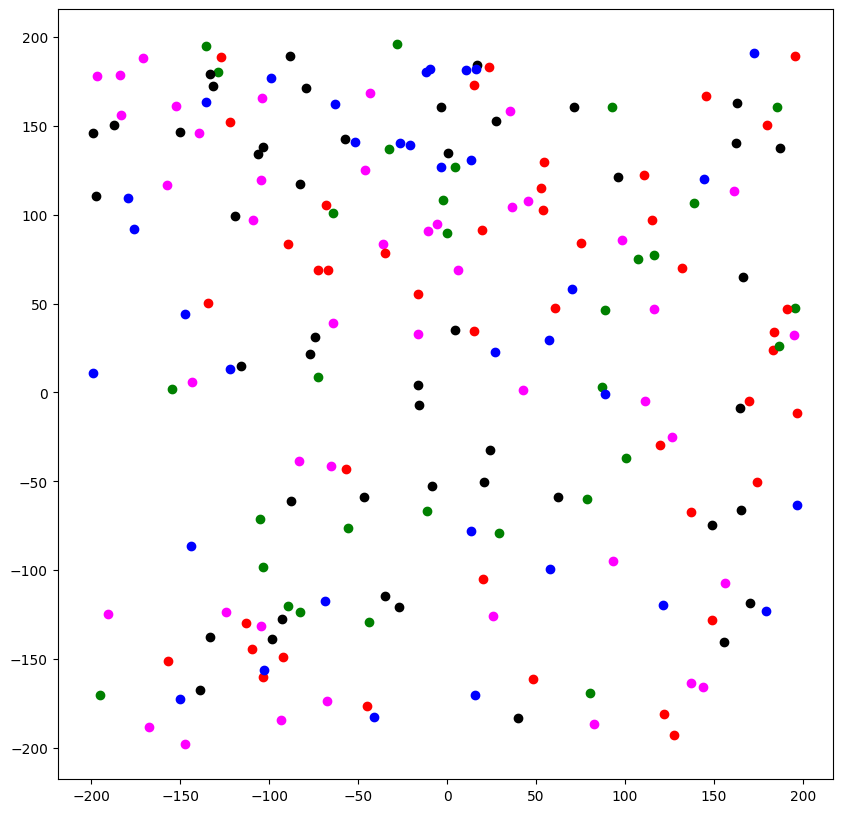

In [4]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()
print(Y)

# plotting all points

plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="red",marker="o")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], c="green",marker="o")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="blue",marker="o")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="black",marker="o")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="magenta",marker="o")
plt.show()

In [5]:
features = list(zip(X1, X2)) #zipping the 2 input features into a list


features_np = np.array(features) #converting the list into a numpy array

 # normalizing the output labels to be one-hot encoded and
 # turning it into a numpy array

Y2 = np.array([normalize(i) for i in Y])


In [6]:
# dividing the total set into training (150) & testing (50) sets

features_train = features_np[:150]
Y2_train = Y2[:150]

features_test = features_np[50:]
Y2_test = Y2[50:]

In [7]:


class Neural_Network:
    def __init__(self):
        input_layer_neurons = 2
        hidden_layer_neurons_1 = 5
        hidden_layer_neurons_2 = 6
        hidden_layer_neurons_3 = 4
        output_layer_neurons = 5

        self.learning_rate = 0.02
        self.Weight_Input_Hidden1 = np.random.randn(input_layer_neurons, hidden_layer_neurons_1)
        self.Weight_Hidden1_Hidden2 = np.random.randn(hidden_layer_neurons_1, hidden_layer_neurons_2)
        self.Weight_Hidden2_Hidden3 = np.random.randn(hidden_layer_neurons_2, hidden_layer_neurons_3)
        self.Weight_Hidden3_Output = np.random.randn(hidden_layer_neurons_3, output_layer_neurons)

    def forwardProp(self, input):
        self.hiddenLayer1Input = np.dot(input, self.Weight_Input_Hidden1)
        self.hiddenLayer1Output = self.Sigmoid(self.hiddenLayer1Input)

        self.hiddenLayer2Input = np.dot(self.hiddenLayer1Output, self.Weight_Hidden1_Hidden2)
        self.hiddenLayer2Output = self.Sigmoid(self.hiddenLayer2Input)

        self.hiddenLayer3Input = np.dot(self.hiddenLayer2Output, self.Weight_Hidden2_Hidden3)
        self.hiddenLayer3Output = self.Sigmoid(self.hiddenLayer3Input)

        self.outputLayerInput = np.dot(self.hiddenLayer3Output, self.Weight_Hidden3_Output)
        self.outputLayerOutput = self.Sigmoid(self.outputLayerInput)

        return self.outputLayerOutput

    def BackProp(self, input, target, pred):
        output_error = target - pred
        output_delta = self.learning_rate * output_error * self.Sigmoid_Deriv(pred)

        hiddenLayer3_error = np.dot(output_delta, self.Weight_Hidden3_Output.T)
        hiddenLayer3_delta = self.learning_rate * hiddenLayer3_error * self.Sigmoid_Deriv(self.hiddenLayer3Output)

        hiddenLayer2_error = np.dot(hiddenLayer3_delta, self.Weight_Hidden2_Hidden3.T)
        hiddenLayer2_delta = self.learning_rate * hiddenLayer2_error * self.Sigmoid_Deriv(self.hiddenLayer2Output)

        hiddenLayer1_error = np.dot(hiddenLayer2_delta, self.Weight_Hidden1_Hidden2.T)
        hiddenLayer1_delta = self.learning_rate * hiddenLayer1_error * self.Sigmoid_Deriv(self.hiddenLayer1Output)

        self.Weight_Input_Hidden1 += np.dot(input.T, hiddenLayer1_delta)
        self.Weight_Hidden1_Hidden2 += np.dot(self.hiddenLayer1Output.T, hiddenLayer2_delta)
        self.Weight_Hidden2_Hidden3 += np.dot(self.hiddenLayer2Output.T, hiddenLayer3_delta)
        self.Weight_Hidden3_Output += np.dot(self.hiddenLayer3Output.T, output_delta)

    def Sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def Sigmoid_Deriv(self, sig):
        return sig * (1 - sig)

    def ErrMean(self, input, target):
        predictions = self.forwardProp(input)
        return np.mean(np.square(target - predictions))

    def train(self, input, target):
        output = self.forwardProp(input)
        self.BackProp(input, target, output)


Epoch: 0, error: 0.2299038766381626
Epoch: 10000, error: 0.15579477767697766
Epoch: 20000, error: 0.15440325699697144
Epoch: 30000, error: 0.15365040222798662
Epoch: 40000, error: 0.15312097452434353
Epoch: 50000, error: 0.15267316132193592
Epoch: 60000, error: 0.15235554566335474
Epoch: 70000, error: 0.15211717801379193
Epoch: 80000, error: 0.15190623763180633
Epoch: 90000, error: 0.1516897605110624


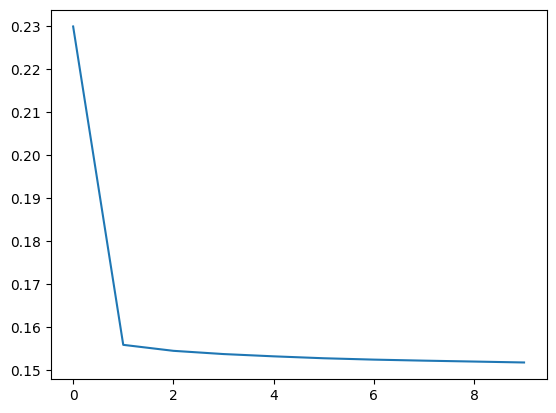

In [8]:
NN = Neural_Network()

err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.forwardProp(features_train)))

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [11]:
# stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}
# returns the dict key with the highest probablity

def getClass(dict):
    max_key = max(dict, key=dict.get)
    return (max_key)

In [12]:
# testing a random input

pred = NN.forwardProp([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[0.24076635 0.09817993 0.12541766 0.21148829 0.23638441]
{'Class-0': 24.07663529205267, 'Class-1': 9.817992598226853, 'Class-2': 12.541765844592176, 'Class-3': 21.14882929397818, 'Class-4': 23.638440878396032}
Class-0


In [13]:
## Performance matrix

predictions = NN.forwardProp(features_test)

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.23333333333333334
Precision for each class:
Class 0: 0.22807017543859648
Class 1: 0.0
Class 2: 0.0
Class 3: 0.25925925925925924
Class 4: 0.08333333333333333
Recall: 0.21005012531328324
F1 Score overall: 0.14128851540616244


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# f1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.3058823529411765
Class 1: 0.0
Class 2: 0.0
Class 3: 0.3529411764705882
Class 4: 0.04761904761904761


Confusion Matrix:
[[13  0  0 12  3]
 [10  0  0 14  2]
 [10  0  0 15  3]
 [14  0  0 21  3]
 [10  0  0 19  1]]


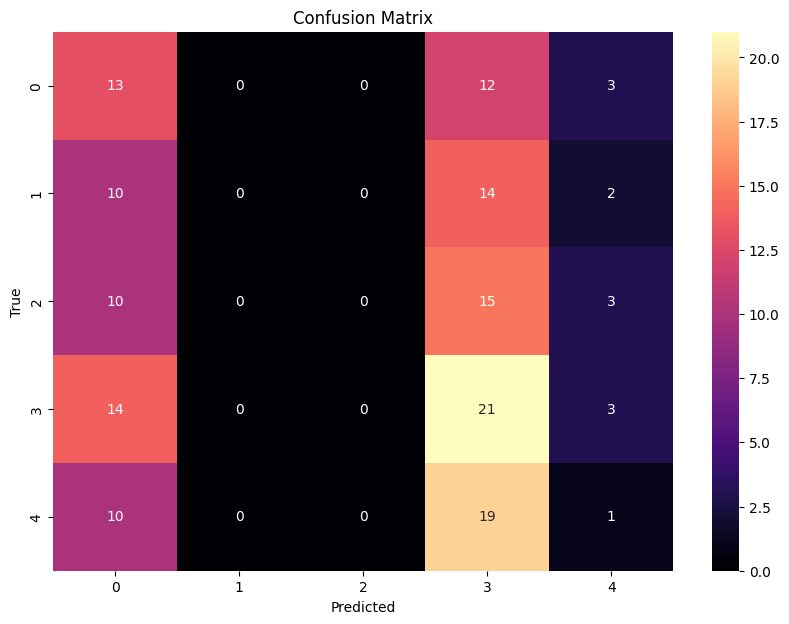

In [15]:
## Result Analysis

# confusion matrix
def conf(Y_true, Y_pred, c = 'magma'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

conf(Y_true, Y_pred)
print()